# Business Case: Yulu - Hypothesis Testing

Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [209]:
df = pd.read_csv('Yulu.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
df.shape  #represents no. of rows and columns

(10886, 12)

In [4]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [5]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

No null value in dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [210]:
#Converting the datatype of datetime column from object to datetime
df['datetime'] = pd.to_datetime(df['datetime'])

#Converting the datatype of few columns into categorical
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 1020.7+ KB


In [15]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [16]:
df.describe(include='object')

,season,holiday,workingday,weather
count,10886,10886,10886,10886
unique,4,2,2,4
top,4,0,1,1
freq,2734,10575,7412,7192


In [19]:
print(f"Data ranges from {df['datetime'].min()} to {df['datetime'].max()}")

Data ranges from 2011-01-01 00:00:00 to 2012-12-19 23:00:00


In [181]:
df['datetime'].max() - df['datetime'].min()  # total time period

Timedelta('718 days 23:00:00')

**OBSERVATION**
- We have four seasons and four weather types in the dataset. Most data points occur in season 4 (winter) and weather type 1 (clear or cloudy). This suggests that consumers prefer renting bikes during winter on clear or cloudy days to enjoy the winter sun.
- Regarding the temperature, the data spans from 0.82 degrees Celsius to 41 degrees Celsius, with an average temperature of around 21 degrees Celsius. Conversely, the felt temperature ranges from 0.76 degrees Celsius to 45.45 degrees Celsius, and the average felt temperature is recorded as 23.65 degrees Celsius.
- Humidity values vary between 0 and 100, with an average humidity level of 61.9. As for windspeed, it falls within the range of 0 to 57, with an average windspeed of 12.8.
- The count of rented bikes per day varies from 1 to 977, with an approximate average of 192 rentals. Furthermore, the number of casual riders is lower than that of registered riders. Casual riders range from 0 to 367, with an average of 36, while registered riders range from 0 to 886, with an average of 151 riders per day.
- The data is given from Timestamp('2011-01-01 00:00:00') to Timestamp('2012-12-19 23:00:00'). The total time period for which the data is given is '718 days 23:00:00'.

In [20]:
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [21]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [22]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [24]:
df.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [183]:
# setting the 'datetime' column as the index of the DataFrame 'df'
df.set_index('datetime', inplace = True)
# By setting the 'datetime' column as the index, it allows for easier and more efficient access, 
    # filtering, and manipulation of the data based on the datetime values. 

# resampling the DataFrame by the year 
df1 = df.resample('Y')['count'].mean().to_frame().reset_index()

# Create a new column 'prev_count' by shifting the 'count' column one position up 
# to compare the previous year's count with the current year's count
df1['prev_count'] = df1['count'].shift(1) 

# Calculating the growth percentage of 'count' with respect to the 'count' of previous year
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1

,datetime,count,prev_count,growth_percent
0,2011-12-31,144.223349,NaN,NaN
1,2012-12-31,208.529549,144.223349,44.587925


- This data suggests that there was substantial growth in the count of the variable over the course of one year.
- The mean total hourly count of rental bikes is 144 for the year 2011 and 208 for the year 2012. An annual growth rate of 44.59 % can be seen in the demand of electric vehicles on an hourly basis.

# Univariate Analysis

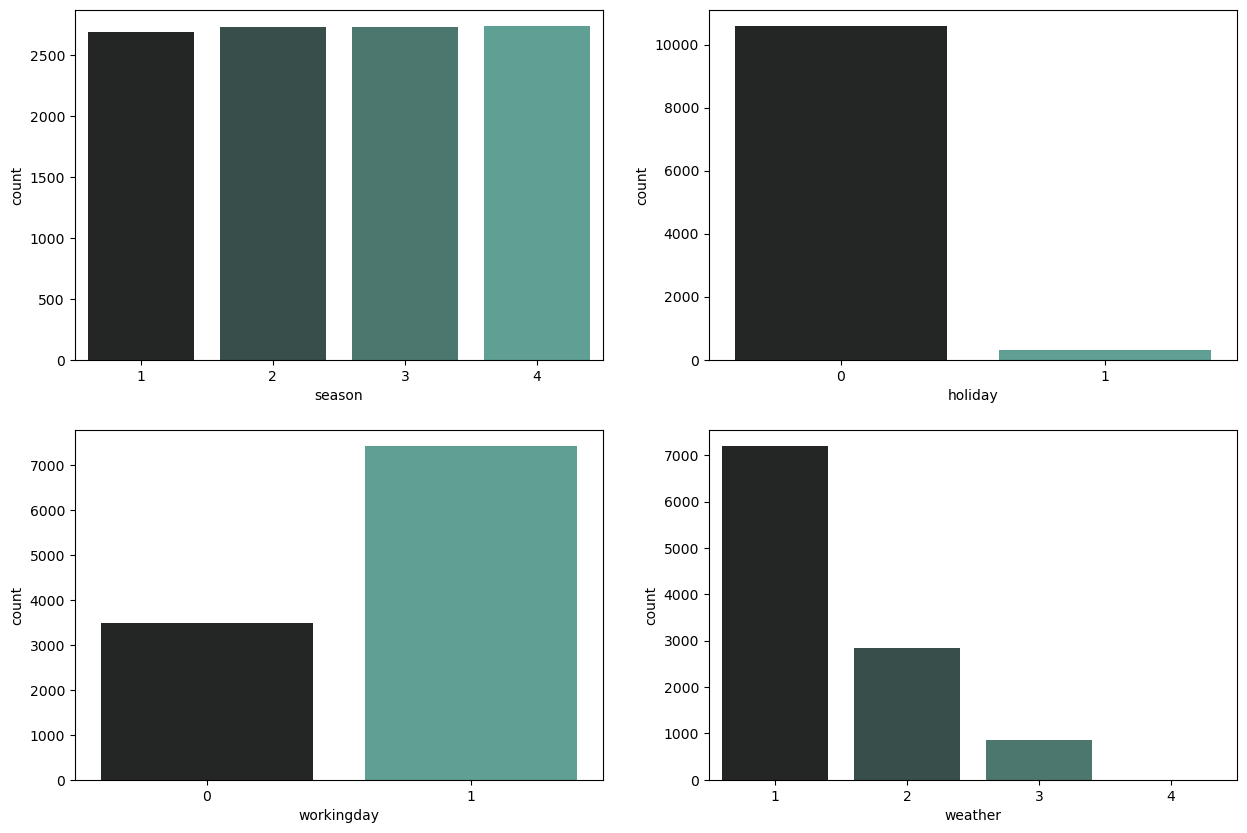

In [42]:
col = ['season', 'holiday', 'workingday', 'weather']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
index = 0

for row in range(2):
    for column in range(2):  
        sns.countplot(x=col[index], data=df, ax=axes[row, column], palette="dark:#5A9")  

plt.show()

- The data appears typical, with an expected distribution of days across all seasons.
- a higher occurrence of working days, and predominantly clear to partly cloudy weather conditions.

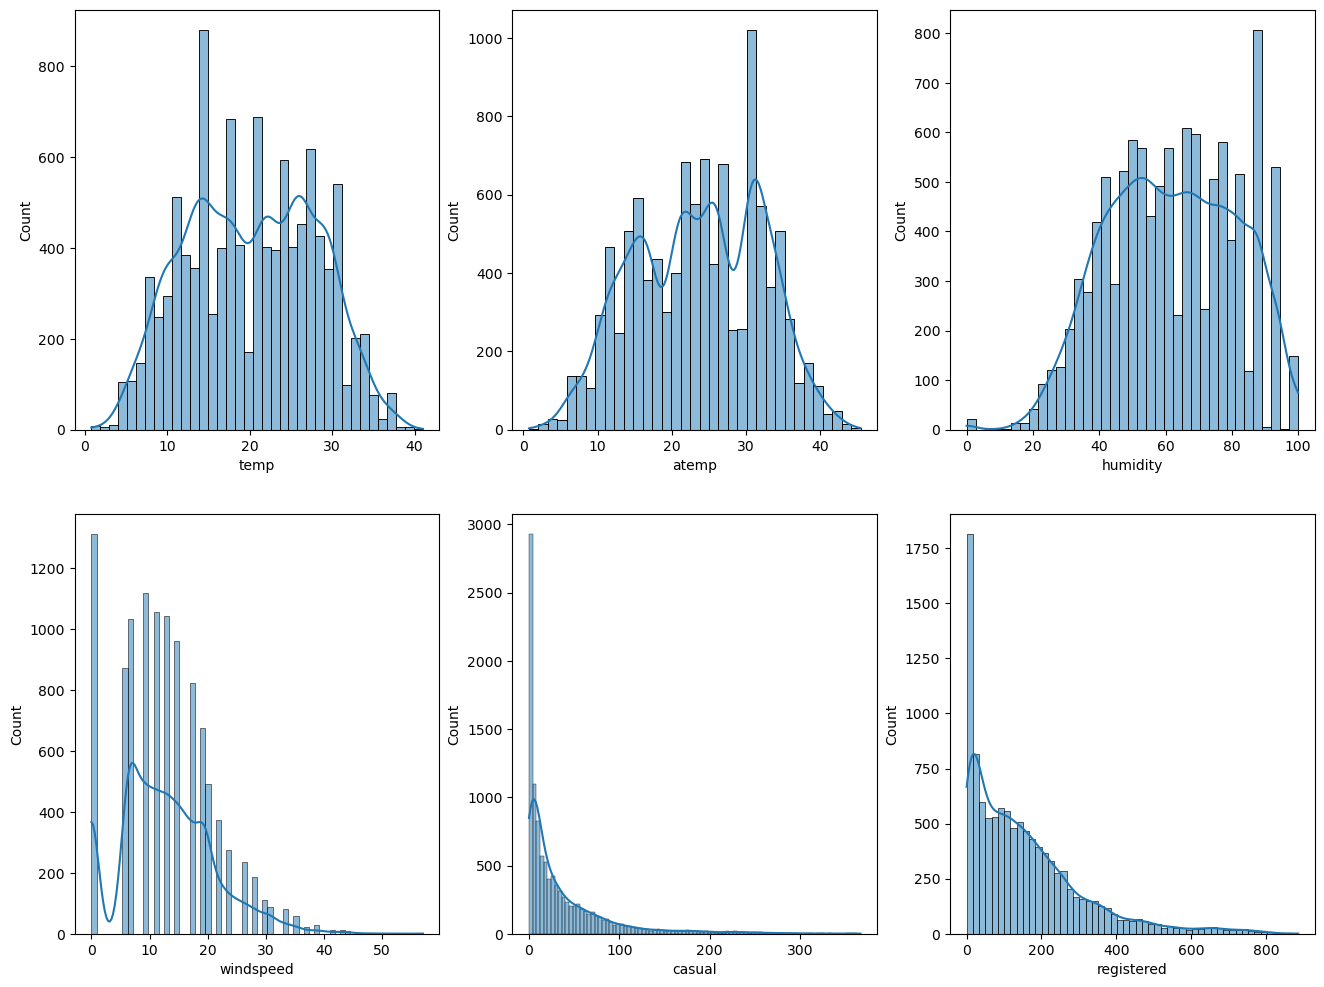

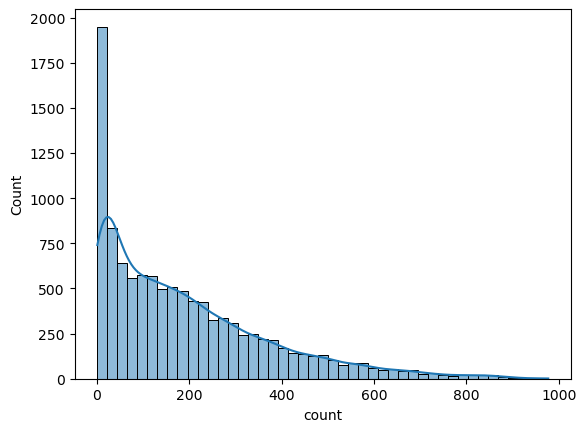

In [58]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axes[row, col], kde=True)
        index += 1

plt.show()

sns.histplot(df[num_cols[-1]], kde=True)
plt.show()

- Temperature ('temp') and 'feels-like' temperature ('atemp') follow a similar distribution, indicating a strong correlation between them.
- "Humidity values show some variability, with no significant outliers.
- Windspeed values vary widely, with some extreme values as outliers.
- The counts of casual and registered riders have distinct distributions, suggesting different patterns for these two rider categories. Casual riders exhibit more variability in daily counts compared to registered riders.
- The total count of rented bikes has a positive skew, indicating a few days with exceptionally high bike rental numbers.

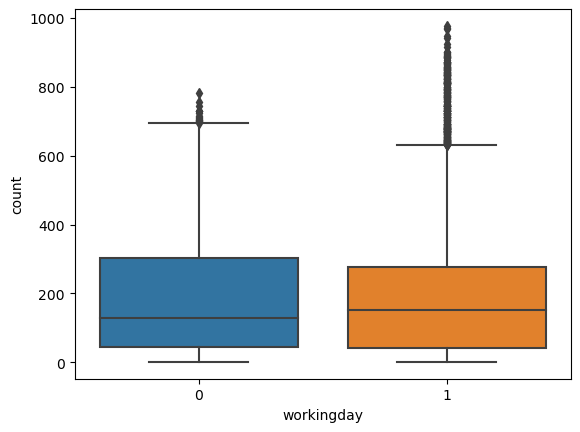

In [57]:
sns.boxplot(x='workingday', y='count', data=df)
plt.show()

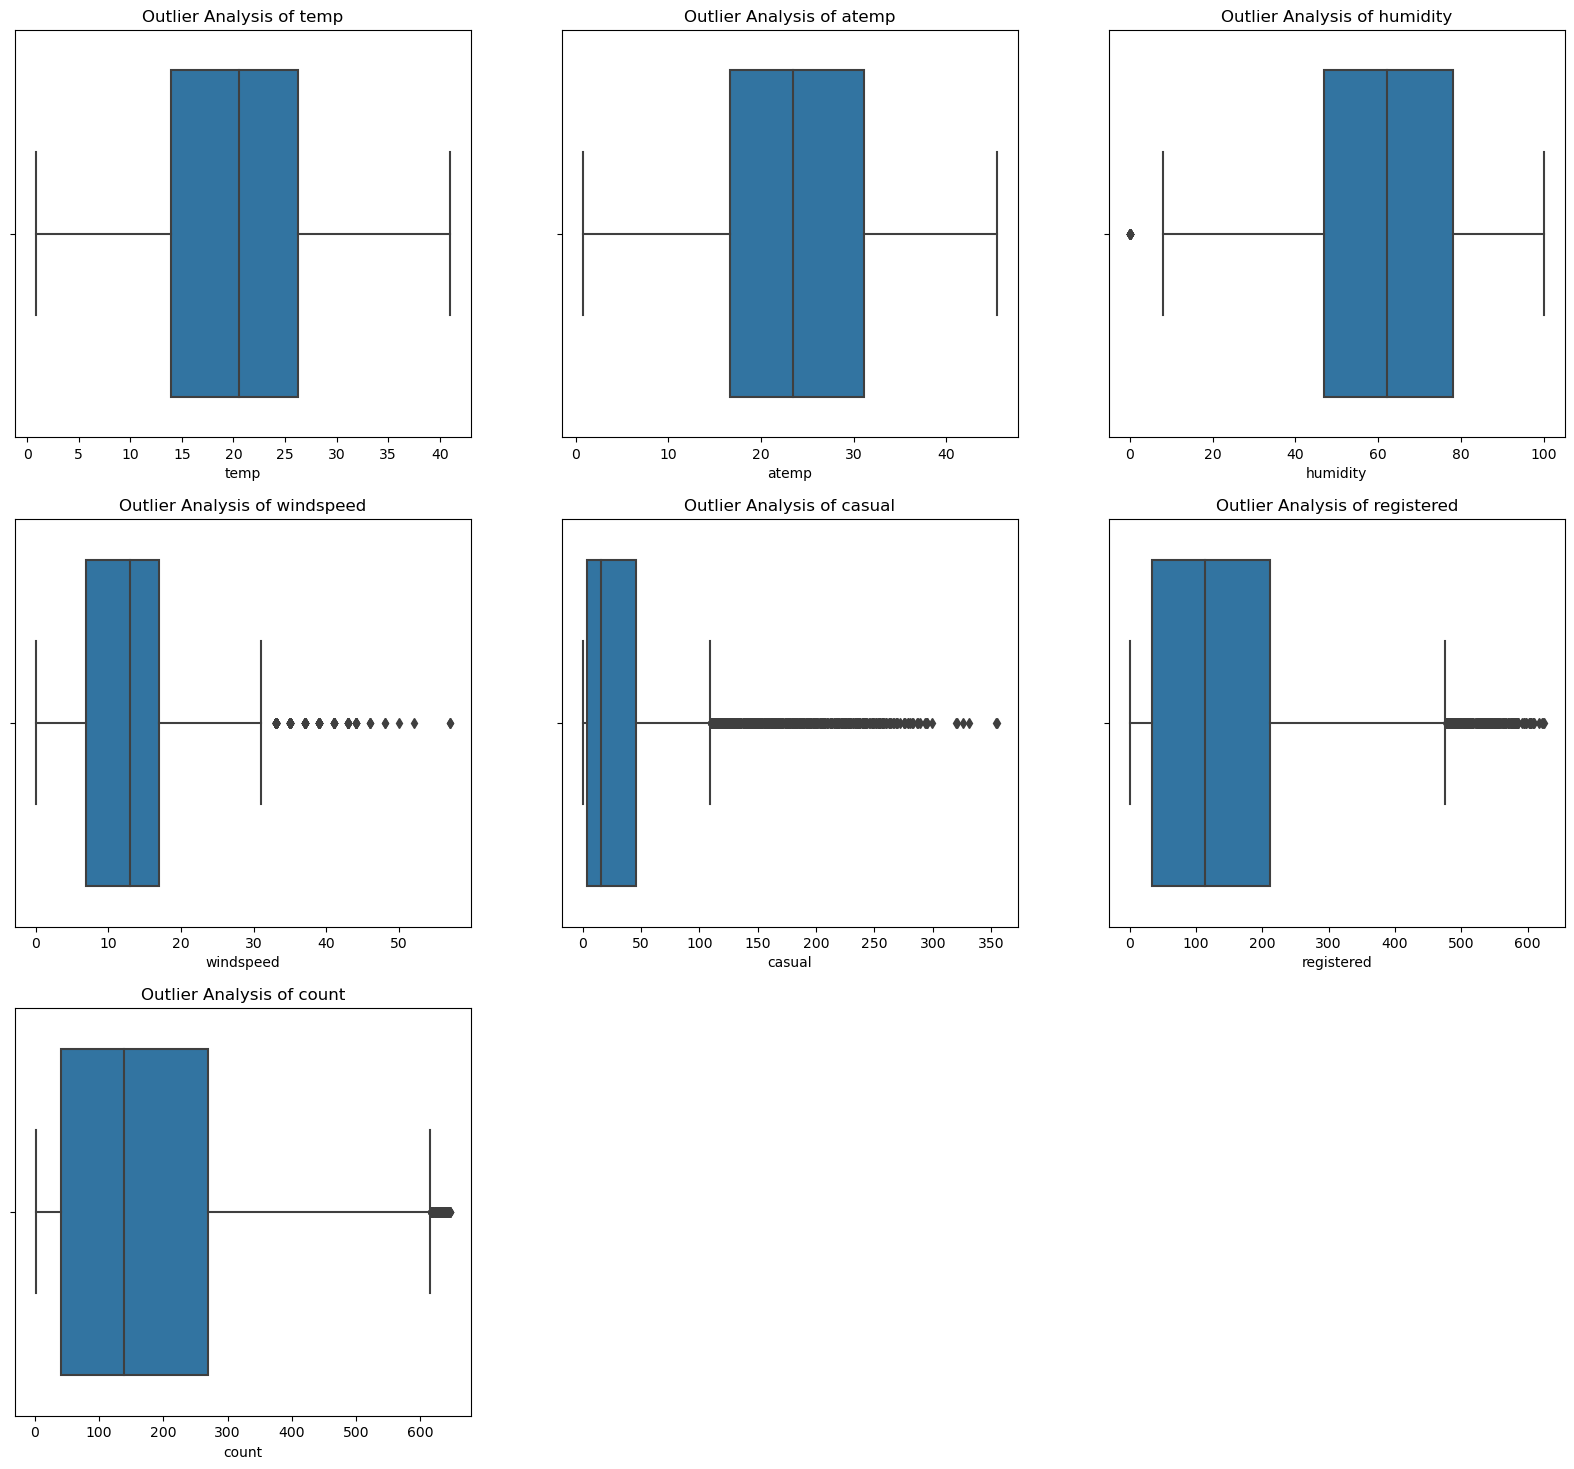

In [64]:
plt.figure(figsize = (20,18))
features = ['temp', 'atemp','humidity', 'windspeed', 'casual', 'registered', 'count']
for i in range(len(features)):                              
     plt.subplot(3, 3, i+1)
     sns.boxplot(x = df[features[i]])
     plt.title('Outlier Analysis of {}'.format(features[i]))

plt.show()

**It seems outliers are present on windspeed, casual, registered, count. And shows casual has more no. of outliers**

### Outlier Detection

In [215]:
columns_list = ['windspeed', 'casual', 'registered', 'count']

def outlier_info(df,columns_list):
    for col in columns_list:
        print("\nOutlier data for {}".format(col))
        Q1 = df[col].quantile(0.25)
        Q2 = df[col].median()
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_whisker = Q1 - (1.5 * IQR)
        upper_whisker = Q3 + (1.5 * IQR)
        
        outliers = df[(df[col] < lower_whisker) | (df[col] > upper_whisker)]
        outlier_count = len(outliers)
        
        print("Lower Whisker: {} \nQuartile 1 : {}\nMedian : {}\nQuartile 3 : {}\nIQR : {}\nUpper Whisker : {}".format(lower_whisker,Q1,Q2,Q3,IQR,upper_whisker))
        print("Number of Outliers: {}".format(outlier_count))
outlier_info(df,columns_list)


Outlier data for windspeed
Lower Whisker: -7.993100000000002 
Quartile 1 : 7.0015
Median : 12.998
Quartile 3 : 16.9979
IQR : 9.996400000000001
Upper Whisker : 31.992500000000003
Number of Outliers: 227

Outlier data for casual
Lower Whisker: -63.5 
Quartile 1 : 4.0
Median : 17.0
Quartile 3 : 49.0
IQR : 45.0
Upper Whisker : 116.5
Number of Outliers: 749

Outlier data for registered
Lower Whisker: -243.0 
Quartile 1 : 36.0
Median : 118.0
Quartile 3 : 222.0
IQR : 186.0
Upper Whisker : 501.0
Number of Outliers: 423

Outlier data for count
Lower Whisker: -321.0 
Quartile 1 : 42.0
Median : 145.0
Quartile 3 : 284.0
IQR : 242.0
Upper Whisker : 647.0
Number of Outliers: 300


- windspeed median (12.998) is closer to the lower quartile (Q1: 7.0015) than the upper quartile (Q3: 16.9979). There are 217 outliers for windspeed, which suggests that there are a significant number of instances where windspeed is much higher or lower than the typical values.

- casual median (16.0) is closer to the lower quartile (Q1: 4.0) than the upper quartile (Q3: 46.0). There are 743 outliers for casual riders

- There are 242 outliers for registered riders, suggesting that there are days with an unusually high or low number of registered riders.
- There are 77 outliers for the total count, indicating that some days experience an exceptionally high or low number of bike rentals

# Bivariate Analysis

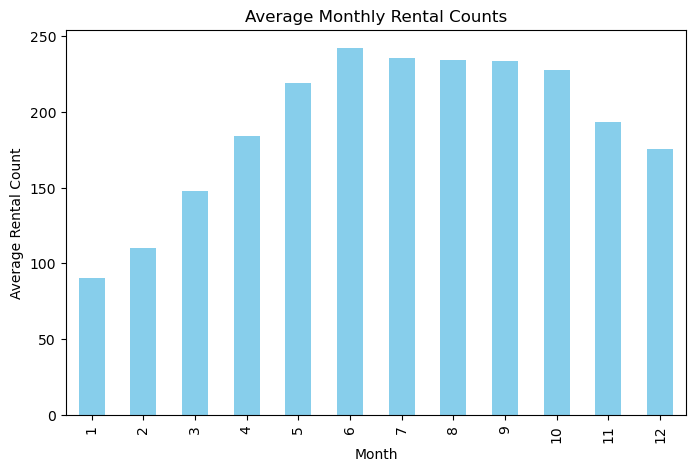

In [212]:
df_copy= df.copy()
# Extracting the month from the timestamp
df_copy['month'] = df_copy['datetime'].dt.month

# Calculating the average hourly rental counts for each month
monthly_averages = df_copy.groupby('month')['count'].mean()

# Plot the average rental counts for each month
plt.figure(figsize=(8, 5))
monthly_averages.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Rental Count')
plt.title('Average Monthly Rental Counts')
plt.show()

- The average hourly count of rental bikes is the lowest in the month of January followed by February and March.

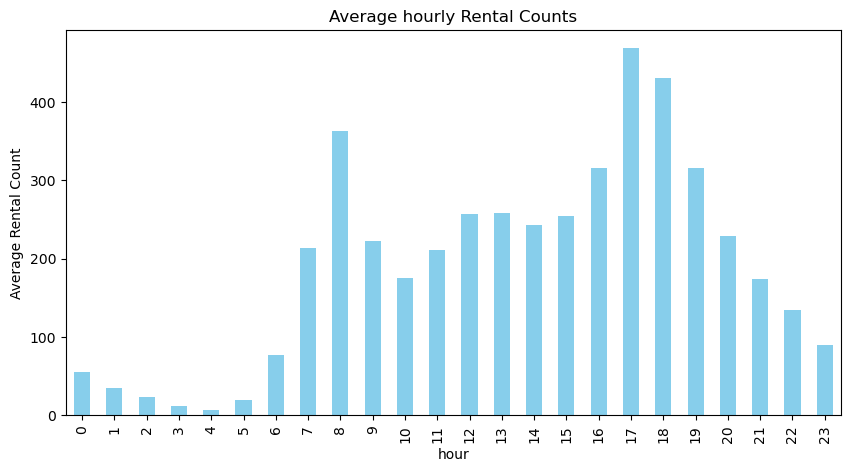

In [213]:
# Extracting the month from the timestamp
df_copy['hour'] = df_copy['datetime'].dt.hour

# Calculating the average hourly rental counts for each month
hourly_averages = df_copy.groupby('hour')['count'].mean()

time_labels = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']

# Plot the average rental counts for each day
plt.figure(figsize=(10, 5))
hourly_averages.plot(kind='bar', color='skyblue')
plt.xlabel('hour')
plt.ylabel('Average Rental Count')
plt.title('Average hourly Rental Counts')
plt.show()

- There is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.


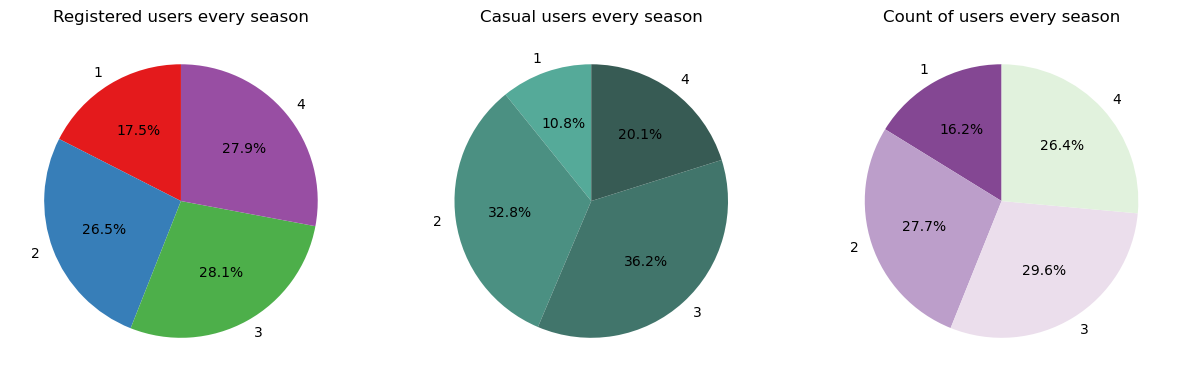

In [70]:
season1 = df.groupby('season')['registered'].sum().reset_index()
season2 = df.groupby('season')['casual'].sum().reset_index()
season3 = df.groupby('season')['count'].sum().reset_index()

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.pie(season1['registered'], labels=season1['season'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette("Set1"))
plt.title('Registered users every season')
plt.subplot(1,3,2)
plt.pie(season2['casual'], labels=season2['season'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette("dark:#5A9_r"))
plt.title('Casual users every season')
plt.subplot(1,3,3)
plt.pie(season3['count'], labels=season3['season'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette("PRGn"))
plt.title('Count of users every season')
plt.show()

The count of rented bikes is highest during the fall season, followed by winter and summer, but it's notably lower in the spring season.

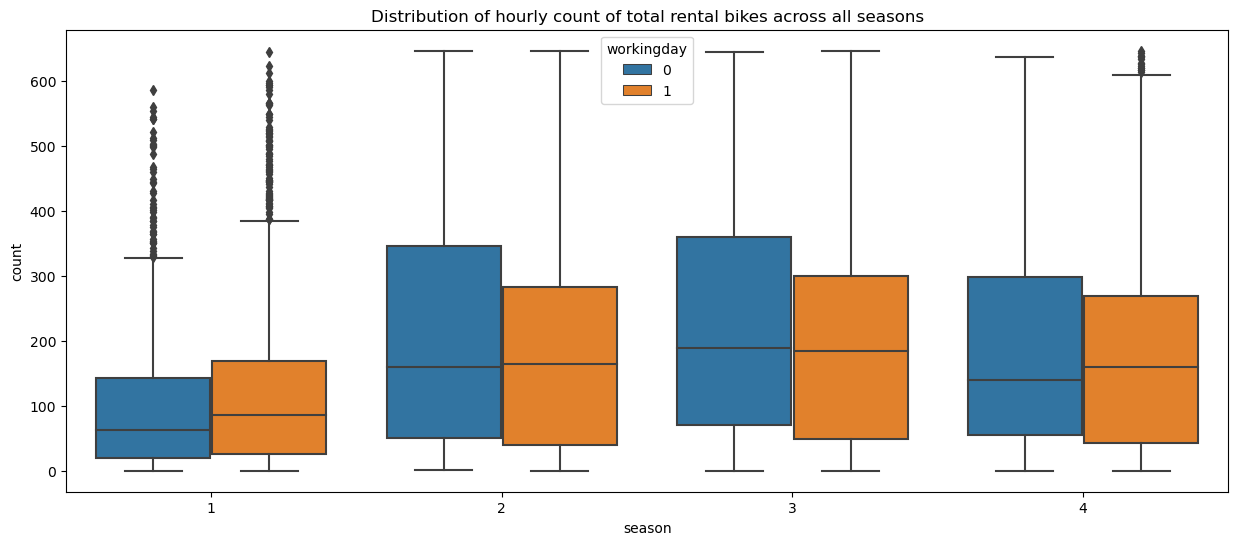

In [91]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons')
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday')
plt.show()

The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

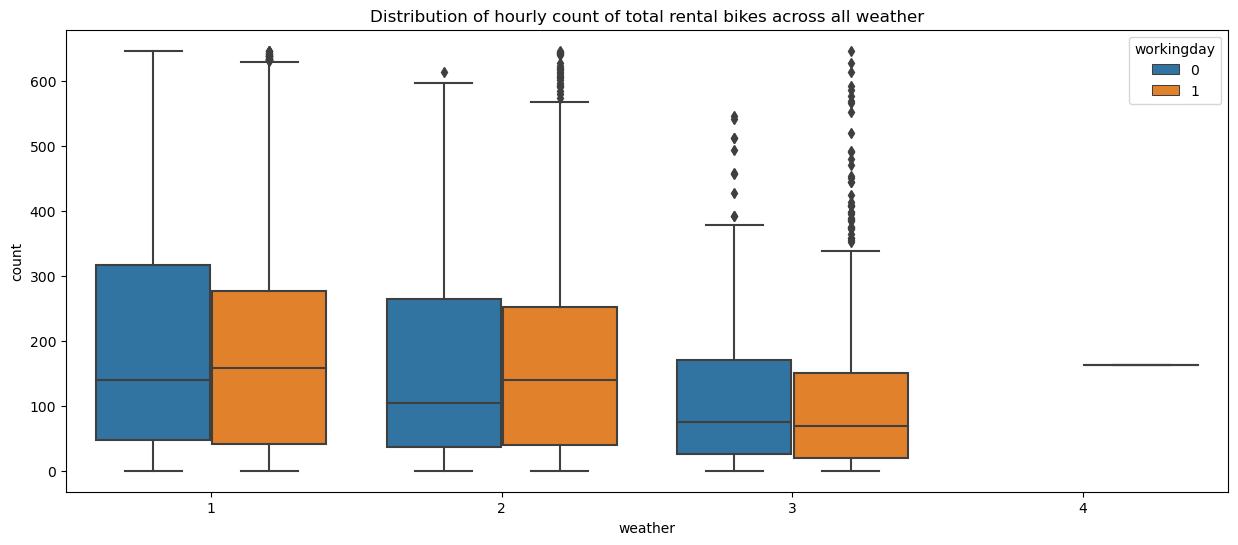

In [92]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all weather')
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday')
plt.show()

The count of hourly rentals for total bikes is most elevated during clear and cloudy weather conditions, with misty and rainy weather following in terms of rental frequency. Records for extreme weather conditions are notably scarce.

In [216]:
corr_data = df.corr()
corr_data

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


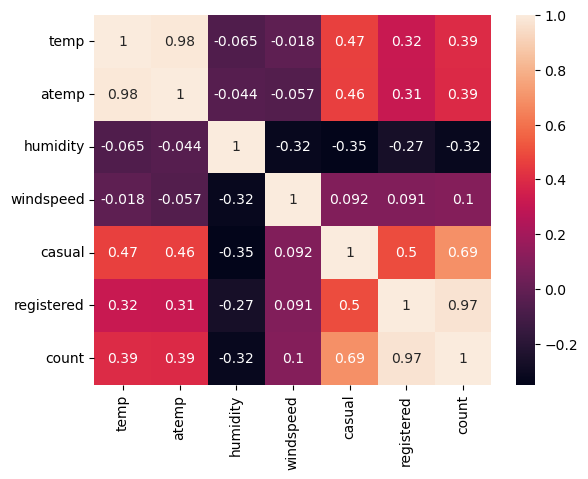

In [217]:
sns.heatmap(data = corr_data, annot=True)
plt.show()

- Minimal or negligible correlations are found among all other combinations of columns.
- No substantial positive or negative correlations (0.7 - 0.9) are present between any column pairs.
- Moderate positive correlations (0.5 - 0.7) are evident between [casual, count] and [casual, registered] columns.
- Slight positive correlations (0.3 - 0.5) are observed among [count, temp], [count, atemp], and [casual, atemp] column pairs.
- A robust correlation (> 0.9) can be observed between [atemp, temp] and [count, registered] columns.


# Hypothesis Testing 

### 1. Whether Working Day has an effect on the number of electric cycles rented?

*STEP-1* : Set up Null Hypothesis

**Null Hypothesis (H0)**: Working day has no effect on the number of electric cycles rented.

**Alternative Hypothesis (H1)**: Working day has an effect on the number of electric cycles rented.

*STEP-2* : Checking for basic assumpitons for the hypothesis
- Distribution check using **QQ Plot**
- Homogeneity of Variances using **Levene's test**

*STEP-3*: Compute the p-value and fix value of alpha.

**alpha** = 0.05

*STEP-4*: Compare **p-value** and **alpha**.

Based on p-value, we will accept or reject H0.

1. **p-val < alpha** : Reject H0
2. **p-val > alpha** : Accept H0


Visual Tests to know if the samples follow normal distribution

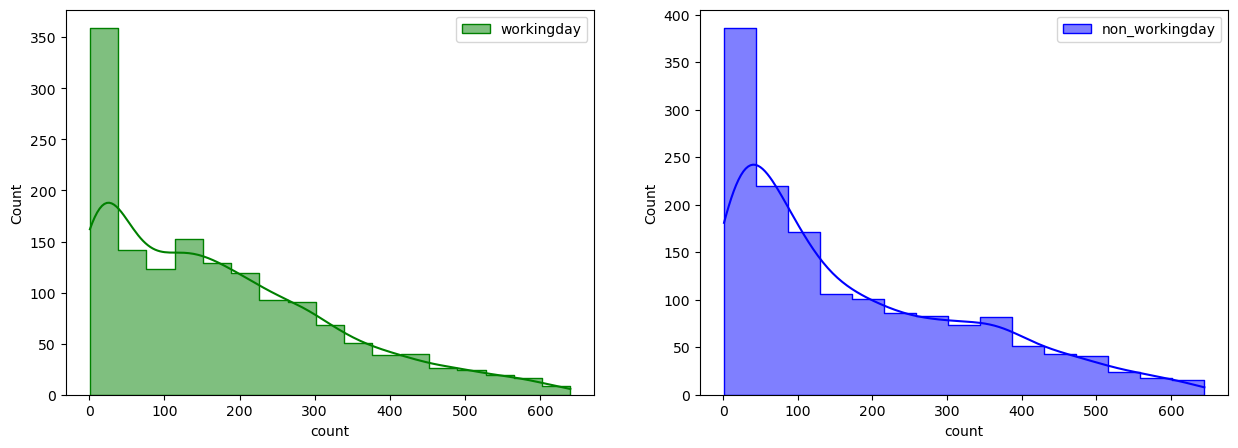

In [137]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['workingday'] == 1, 'count'].sample(1500), 
             element = 'step', color = 'green', kde = True, label = 'workingday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['workingday'] == 0, 'count'].sample(1500), 
             element = 'step', color = 'blue', kde = True, label = 'non_workingday')
plt.legend()
plt.show()

 - From the above plot it seems distributions do not follow normal distribution

**Distribution check using QQ Plot**

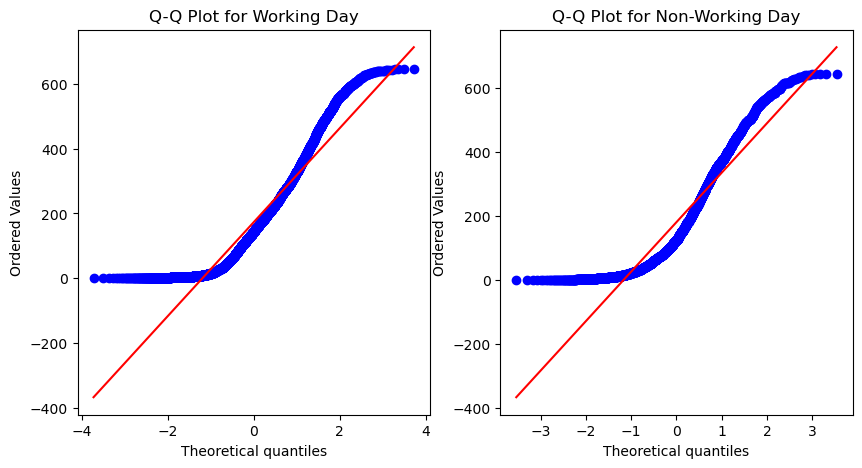

In [106]:
import matplotlib.pyplot as plt
import scipy.stats as stats

data_workingday = df[df['workingday'] == 1]['count']
data_non_workingday = df[df['workingday'] == 0]['count']

# Create Q-Q plots for both categories
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
stats.probplot(data_workingday, dist="norm", plot=plt)
plt.title("Q-Q Plot for Working Day")

plt.subplot(1, 2, 2)
stats.probplot(data_non_workingday, dist="norm", plot=plt)
plt.title("Q-Q Plot for Non-Working Day")

plt.show()

-From the above plot it seems distributions do not follow normal distribution

**Homogeneity of Variances using Lavene's test**

In [135]:
from scipy.stats import levene

# Null Hypothesis (H0) - Homogeneous Variance within workingday and non-working day
# Alternate Hypothesis (HA) - Non-Homogeneous Variance within workingday and non-working day

test_stat, p_valu = levene(df.loc[df['workingday'] == 1, 'count'].sample(1500),
                            df.loc[df['workingday'] == 0, 'count'].sample(1500))
print('p-value', p_valu)
if p_valu < 0.05:
    print('The samples do not have Homogeneous Variance')
else:
    print('The samples have Homogeneous Variance')


p-value 0.00014923437145031318
The samples do not have Homogeneous Variance


**Test Statistics : Shapiro-Wilk test for normality**

In [127]:
from scipy.stats import shapiro

test_stat, p_value = stats.shapiro(df.loc[df['workingday'] == 1, 'count'].sample(1500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 3.0817910945225414e-30
The sample does not follow normal distribution


In [136]:
test_stat, p_value = stats.shapiro(df.loc[df['workingday'] == 0, 'count'].sample(1500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 2.5944135982959068e-31
The sample does not follow normal distribution


**Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.**

In [140]:
from scipy.stats import mannwhitneyu

mwu_stat, p_val = mannwhitneyu(df[df['workingday'] == 1]['count'],df[df['workingday'] == 0]['count'])
print('P-value :',p_val)
if p_val < 0.05:
    print('Reject H0')
    print('Working day has effect on the number of electric cycles rented.')
else:
    print('Fail to reject H0')
    print('Working day has no effect on the number of electric cycles rented.')

P-value : 0.08466110521914866
Fail to reject H0
Working day has no effect on the number of electric cycles rented.


**Hence, there is no statistically significant difference in the mean hourly count of total rental bikes between working and non-working days.**
- In this context, we can conclude that the presence of working days does not have a significant impact on the bike rental count, as there is evident usage on non-working days as well. Yulu may consider strategies to engage more customers on working days and position itself as an appealing alternative for commuting purposes.

### 2.(a) if No. of cycles rented is similar or different in different  season

**Null Hypothesis (H0)** = There is not much difference between No. of cycles rented similar or different in different seasons

**Alternate Hypothesis (H1)** = There is significant difference between No. of cycles rented similar or different in different seasons

**alpha** = 0.05

**if the samples follow normal distribution**

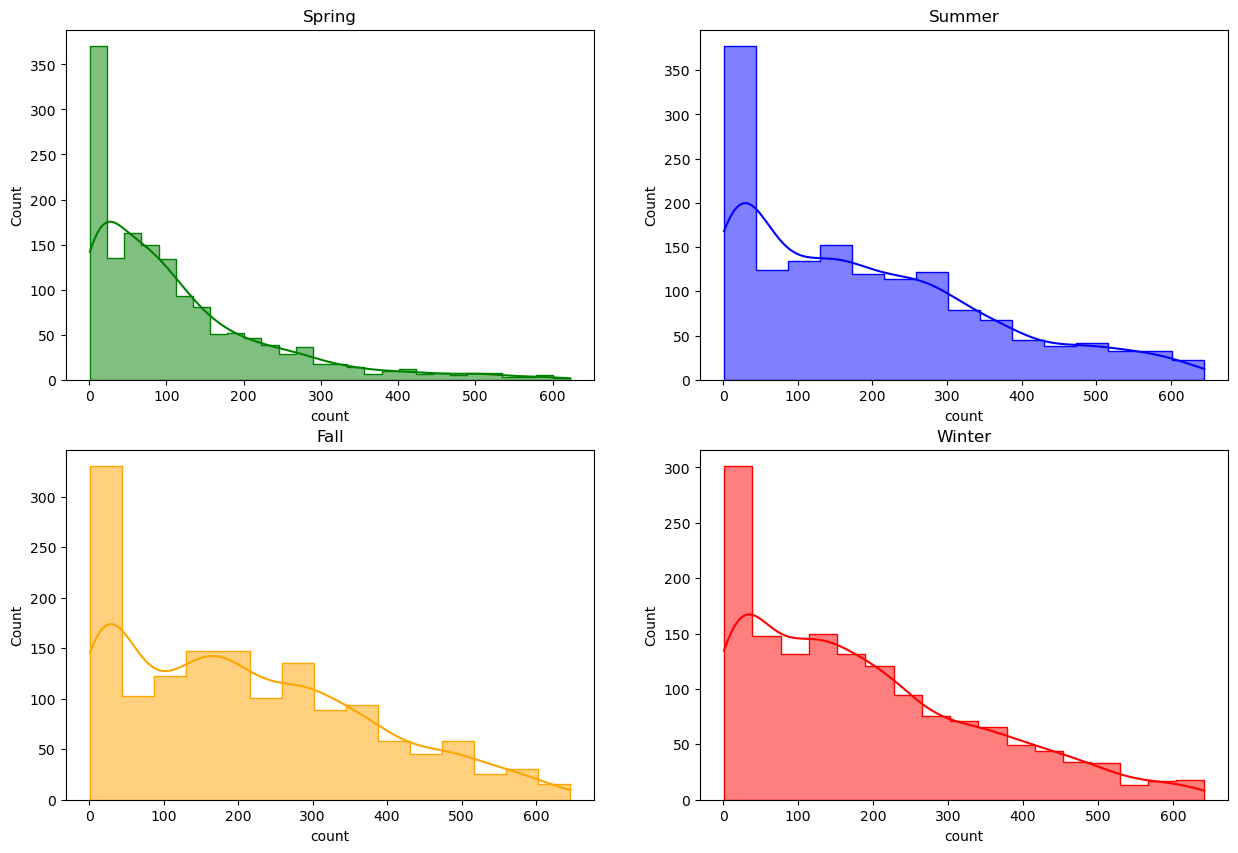

In [142]:
plt.figure(figsize=(15, 10))

# Creating subplots for each season
plt.subplot(2, 2, 1)
sns.histplot(df.loc[df['season'] == 1, 'count'].sample(1500), 
             element='step', color='green', kde=True)
plt.title('Spring')

plt.subplot(2, 2, 2)
sns.histplot(df.loc[df['season'] == 2, 'count'].sample(1500), 
             element='step', color='blue', kde=True)
plt.title('Summer')

plt.subplot(2, 2, 3)
sns.histplot(df.loc[df['season'] == 3, 'count'].sample(1500), 
             element='step', color='orange', kde=True)
plt.title('Fall')

plt.subplot(2, 2, 4)
sns.histplot(df.loc[df['season'] == 4, 'count'].sample(1500), 
             element='step', color='red', kde=True)
plt.title('Winter')

plt.show()

Since all the four plots are rightly skewed which shows that data is not normally distributed. Hence we cannot directly use Anova Test.

Homogeneity of Variances using **Lavene's test**

In [158]:
# Checking for equal variance among different groups with Levene's Test

# Null Hypothesis(H0) : Variance among the groups are equal.
# Alternate Hypothesis(Ha) : Variance among the groups are not equal.

group1 = df["count"][df["season"]==1]
group2 = df["count"][df["season"]==2]
group3 = df["count"][df["season"]==3]
group4 = df["count"][df["season"]==4]

levene_stat,p1_value = levene(group1,group2,group3,group4)

alpha = 0.05
print("Levene test with Test Statistic: {}, and p-value: {}".format(levene_stat,p_value))
if p1_value < alpha:
    print("Reject Ho: Variance among the groups are not equal")
else:
    print("Failed to reject Ho: Variance among the groups are equal")

Levene test with Test Statistic: 177.52397676140944, and p-value: 2.7369378742733244e-40
Reject Ho: Variance among the groups are not equal


**Hence we can use Kruskal - Wallis test here.**

In [147]:
#Ho: Season has no effect on number of rides book.
#Ha: Season affects the number of rides book.

from scipy.stats import kruskal

test_stat, p_value = kruskal(group1, group2, group3, group4)

print('p-value', p_value)
if p_value < 0.05:
    print('Reject H0')
else:
    print('Fail to rejecct H0') 

p-value 6.376253250003707e-134
Reject H0
p-value 2.6643548968275643e-112


**With a very low p-value (less than 0.05), we have strong evidence to reject the null hypothesis, indicating that the season does indeed influence the number of rented cycles.**

### 2.(b) if No. of cycles rented is similar or different in different weather

**Null Hypothesis (H0)** = There is not much difference between No. of cycles rented similar or different in different weather

**Alternate Hypothesis (H1)** = There is significant difference between No. of cycles rented similar or different in different weather

**alpha** = 0.05

**if the samples follow normal distribution**

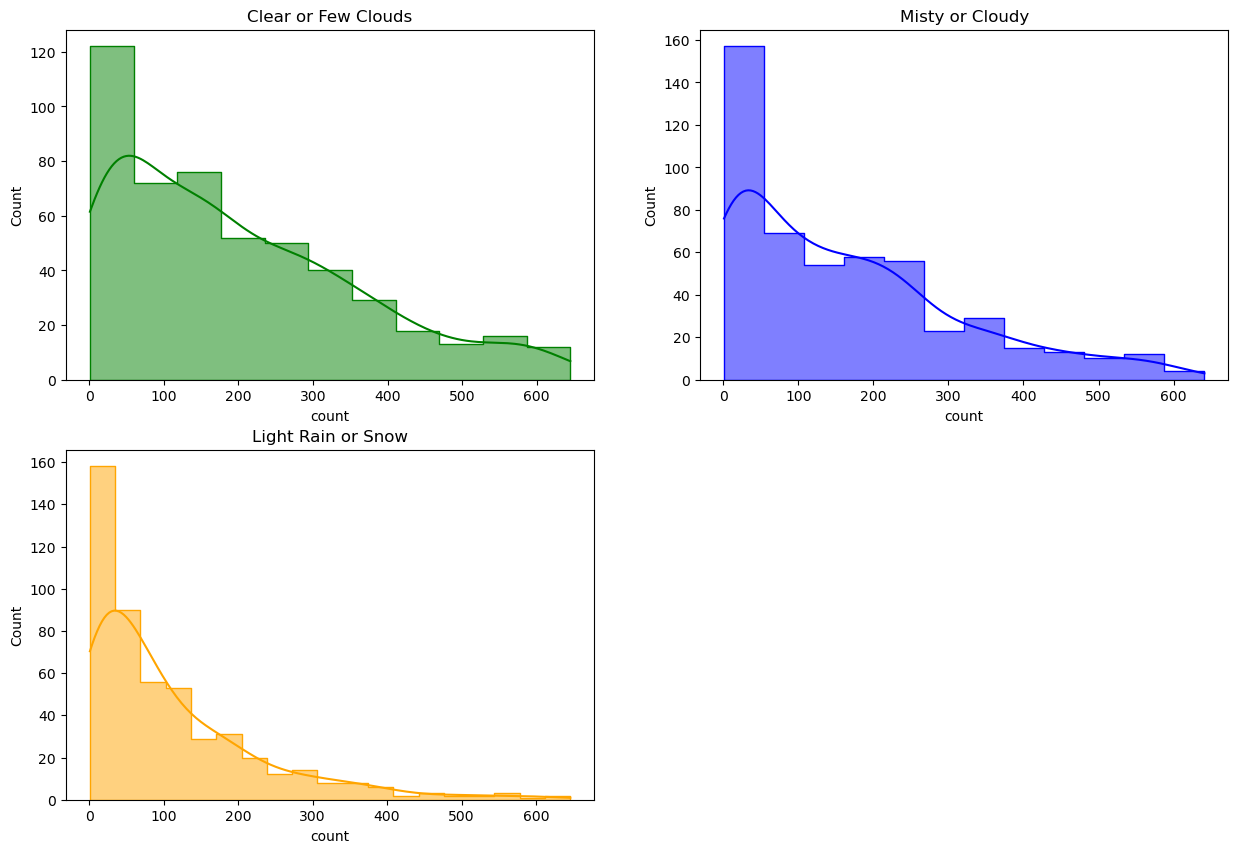

In [164]:
plt.figure(figsize=(15, 10))

# Creating subplots for each weather
plt.subplot(2, 2, 1)
sns.histplot(df.loc[df['weather'] == 1, 'count'].sample(500), 
             element='step', color='green', kde=True)
plt.title('Clear or Few Clouds')

plt.subplot(2, 2, 2)
sns.histplot(df.loc[df['weather'] == 2, 'count'].sample(500), 
             element='step', color='blue', kde=True)
plt.title('Misty or Cloudy')

plt.subplot(2, 2, 3)
sns.histplot(df.loc[df['weather'] == 3, 'count'].sample(500), 
             element='step', color='orange', kde=True)
plt.title('Light Rain or Snow')

plt.show()

- (wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group).
- Since all the three plots are rightly skewed which shows that data is not normally distributed. Hence we cannot directly use Anova Test

Homogeneity of Variances using **Lavene's test**

In [165]:
 #Checking for equal variance among different groups with Levene's Test

# Null Hypothesis(H0) : Variance among the groups are equal.
# Alternate Hypothesis(Ha) : Variance among the groups are not equal.

weather1 = df["count"][df["weather"]==1]
weather2 = df["count"][df["weather"]==2]
weather3 = df["count"][df["weather"]==3]
weather4 = df["count"][df["weather"]==4]

levene_stat,p1_value = levene(weather1, weather2, weather3, weather4)

alpha = 0.05
print("Levene test with Test Statistic: {}, and p-value: {}".format(levene_stat,p_value))
if p1_value < alpha:
    print("Reject Ho: Variance among the groups are not equal")
else:
    print("Failed to reject Ho: Variance among the groups are equal")

Levene test with Test Statistic: 58.369716883672965, and p-value: 2.7369378742733244e-40
Reject Ho: Variance among the groups are not equal


**Hence we can use Kruskal - Wallis test here.**

In [166]:
#Ho: Weather has no effect on number of rides book.
#Ha: Weather affects the number of rides book.
test_stat, p_value = kruskal(weather1, weather2, weather3, weather4)

print('p-value', p_value)
if p_value < 0.05:
    print('Reject H0')
else:
    print('Fail to rejecct H0')

p-value 2.7369378742733244e-40
Reject H0


**With a very low p-value (less than 0.05), we have strong evidence to reject the null hypothesis, indicating that the weather does indeed influence the number of rented cycles.**

### 3. if Weather is dependent on the season? 

**Null Hypothesis ( H0 )** - weather is independent of season

**Alternate Hypothesis ( HA )** - weather is dependent of seasons.

**alpha** = 0.05

Since we have two categorical features, the **Chi- square test** is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.

In [174]:
# Forming a contingency table to get the values of different pair combinations.

contingency_table = pd.crosstab(index=df["season"],
                                columns= df["weather"],
                                values= df['count'], aggfunc='mean').fillna(0)
contingency_table

weather,1,2,3,4
season,,,,
1,121.780963,106.014006,61.227488,164.0
2,213.230814,175.979710,120.955157,0.0
3,218.216612,208.616580,142.989744,0.0
4,194.268720,180.733164,123.565611,0.0


In [177]:
from scipy.stats import chi2_contingency

_, pValue, _, _ = chi2_contingency(contingency_table)
print('p_value', pValue)
if pValue < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

p_value 1.1638287008777175e-128
Reject Null Hypothesis


- **Hence, using chisquare test we reject the null hypothesis as  p_value is very less than alpha, season has some influence on the weather,**
- a statistically significant association between weather and season is evident in terms of the number of rented bikes. 

# Insights

1. The data spans from January 1, 2011, to December 19, 2012, covering a total period of 718 days and 23 hours.
2. The average hourly bike rental count is 144 for the year 2011 and 208 for the year 2012, indicating a substantial annual growth rate of 44.59% in electric vehicle demand on an hourly basis.
3. A clear seasonal pattern is evident in the bike rental count, with higher demand during the spring and summer months, a slight dip in the fall, and a further decrease in the winter.
4. The lowest average hourly bike rental count is observed in January, followed by February and March.
5. Throughout the day, there is noticeable fluctuation in the rental count, with low counts in the early morning, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and night.
6. More than 80% of the time, the temperature remains below 28 degrees Celsius.
7. Humidity levels are typically higher than 40% for over 80% of the time, indicating a range from optimal to slightly moist conditions.
8. Wind speeds are less than 20 for over 85% of the recorded data.
9. Bike rentals reach their peak during clear and cloudy weather, followed by misty conditions and rainy weather. Records for extreme weather conditions are scarce.
10. The mean hourly bike rental count is statistically similar for both working and non-working days.
11. Significant statistical dependence is observed between weather conditions and seasons concerning the hourly total bike rentals.
12. There is statistically significant dependence of weather conditions 1, 2, and 3 on seasons based on the average hourly total bike rentals.


# Recommendations

**Time-based Pricing**: Explore the option of introducing a flexible hourly pricing model, offering reduced rates during periods of lower demand and slightly elevated rates during peak hours. Such a strategy can incentivize customers to opt for rentals during quieter intervals, promoting equilibrium in demand and resource optimization.

**Seasonal Marketing**: During the summer and fall seasons, particularly in clear or cloudy weather conditions, it's advisable for the company to maintain a larger inventory of bikes available for rental. This is because demand tends to be notably higher during these seasons compared to other times of the year.

**Weather-based Promotions**: Develop promotional campaigns tailored to different weather conditions, with a particular focus on clear and cloudy weather, which consistently yield the highest rental counts. Yulu can introduce weather-dependent discounts to attract and engage customers, leveraging the popularity of bike rentals during these favorable weather conditions.

**Peak Ride Times**: The data indicates that a significant portion of rides is scheduled during office opening and closing hours, suggesting that our primary customer base comprises working professionals. Therefore, Yulu should explore opportunities to offer incentives or establish partnerships with organizations to effectively promote our services to the working class.

**Inventory Management Enhancement**: Evaluate rental demand trends across various months and make inventory adjustments accordingly. In months characterized by reduced rental activity, such as January, February, and March, Yulu can streamline its inventory to prevent overstocking. Conversely, during peak months, it's crucial to maintain an ample supply of bikes to meet the heightened demand effectively.

**Seasonal Bike Maintenance**: In preparation for the high-demand seasons, prioritize comprehensive maintenance assessments for the entire bike fleet to guarantee their optimal performance. Implement regular inspections and servicing throughout the year to proactively address issues and enhance customer experience while minimizing breakdowns.

**Customer feedback & Reviews**: Foster an environment where customers are encouraged to share their feedback and write reviews about their biking experiences. The collection of such feedback serves as a valuable tool for pinpointing areas that require enhancement, gaining insights into customer preferences, and customizing services to align more closely with customer expectations.